# Chicago Crimes and Arrests

Laine Klopfenstein

The goal of this project is to look at features that could be used to predict arrests in Chicago. The data is from 1/1/2014 to 6/30/2016. The target variable is arrest (a binary yes/no variable). There are the following features: Crime type (ranked 1-5), domestic (0/1), beat (numeric), ward (numeric), CPS in session (0/1), windspeed (numeric), wind direction (numeric), temperature (numeric),prior 5 days of average temperature (numeric), light or dark (0/1), year (expanded to three binary features), day of week (expanded to 7 binary features). pre-Pre-processing was done via Matlab. 

In [1]:
#import needed tools
%matplotlib inline
import numpy as np
import collections
import statistics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from matplotlib import pylab
pylab.rcParams['figure.figsize']=(10.0, 8.0)

In [2]:
data=np.loadtxt('projectData.txt',delimiter=',') #load the data(4)

In [3]:
#process the two categorical variables that need to become binary(part 4)
#turn year into 3 features
yr=data[:,4]
yr14=np.array([0]*yr.shape[0])
yr15=[0]*yr.shape[0]
yr16=[0]*yr.shape[0]
for s in range(0,yr.shape[0]):
    if yr[s]==2014:
        yr14[s]=1
    elif yr[s]==2015:
        yr15[s]=1
    else: 
        yr16[s]=1

#process day of week to expand to 7 features
wd=data[:,5]
sun=[0]*wd.shape[0]
mon=[0]*wd.shape[0]
tue=[0]*wd.shape[0]
wed=[0]*wd.shape[0]
thr=[0]*wd.shape[0]
fri=[0]*wd.shape[0]
sat=[0]*wd.shape[0]
for s in range(0,wd.shape[0]):
    if wd[s]==1:
        sun[s]=1
    elif wd[s]==2:
        mon[s]=1
    elif wd[s]==3:
        tue[s]=1
    elif wd[s]==4:
        wed[s]=1
    elif wd[s]==5:
        thr[s]=1
    elif wd[s]==6:
        fri[s]=1
    else:
        sat[s]=1

In [4]:
n=data[:,[0,1,2,3,6,7,8,9,10,11]]#pull features into array from data
X=np.c_[n,yr14,yr15,yr16,sun,mon,tue,wed,thr,fri,sat]#append additional features (year and weekday)
y=data[:,12]#put target data into array

In [5]:
print("Features: %d, Instances: %d" %(X.shape[1],X.shape[0]))#print data shape (part 5)

Features: 20, Instances: 750826


## Target Variable Visualization

Counter({0.0: 548921, 1.0: 201905})


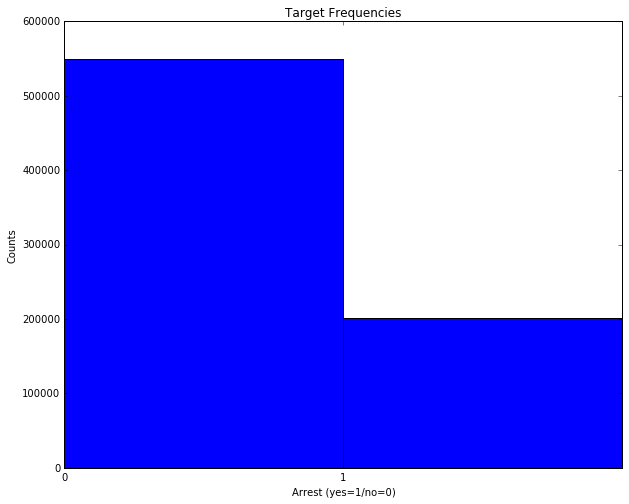

In [6]:
#target variable: is if arrest is made (1) or not (0), (part 6)
bins=[0,1]
c=collections.Counter(y)
print(c)
plt.bar(bins,c.values(),1);
plt.xlabel('Arrest (yes=1/no=0)')
plt.ylabel('Counts')
plt.xticks([0,1])
plt.title('Target Frequencies')

## Feature Visualization

### Crime Severity

Counter({4.0: 434139, 3.0: 157350, 2.0: 83010, 1.0: 54199, 5.0: 22128})


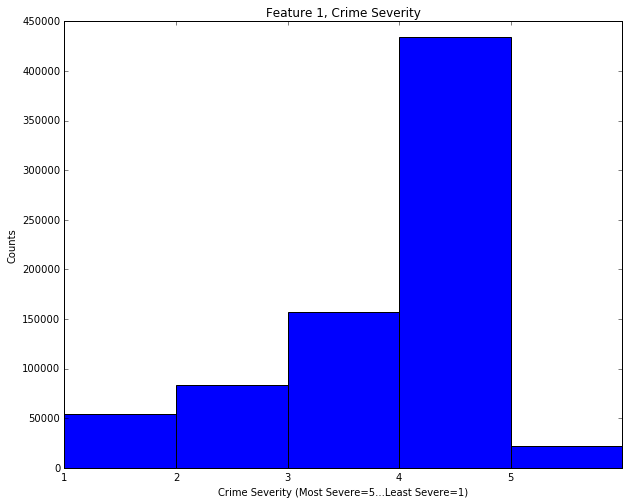

In [7]:
#Crime Severity, categorical with 5 categories, 5 being assumed more 
#severe than 1. from Illinois Uniform Crime Reporting code
bins=[1,2,3,4,5]
c=collections.Counter(X[:,0])
print(c)
plt.bar(bins,c.values(),1);
plt.xlabel('Crime Severity (Most Severe=5...Least Severe=1)')
plt.ylabel('Counts')
plt.xticks([1,2,3,4,5])
plt.title('Feature 1, Crime Severity')

### Domistic

Counter({0.0: 630493, 1.0: 120333})


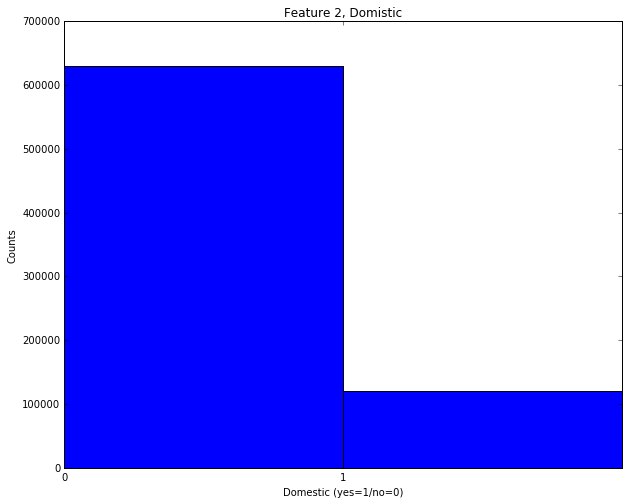

In [8]:
#domistic, categorical with 0 being no, and 1 being yes
bins=[0,1]
c=collections.Counter(X[:,1])
print(c)
plt.bar(bins,c.values(),1);
plt.xlabel('Domestic (yes=1/no=0)')
plt.ylabel('Counts')
plt.xticks([0,1])
plt.title('Feature 2, Domistic')

### Beat

Feature Mean: 1148.691
Feature Variance: 690.638


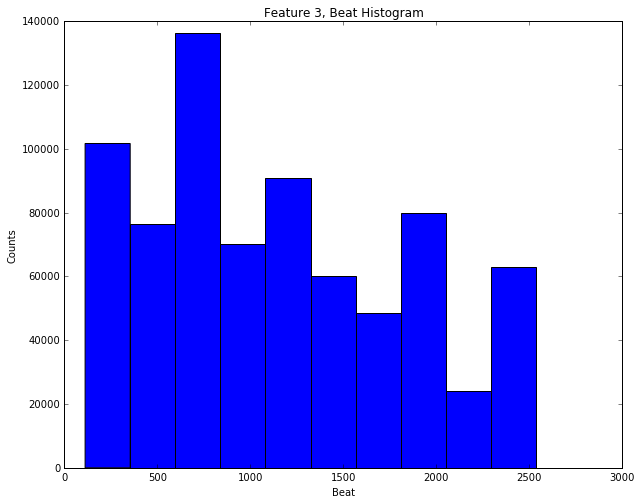

In [9]:
#beat, treated as numeric, given size of data set
print("Feature Mean: %.3f" %statistics.mean(X[:,2]))
print("Feature Variance: %.3f" %statistics.stdev(X[:,2]))
plt.hist(X[:,2])
plt.xlabel('Beat')
plt.ylabel('Counts')
plt.title('Feature 3, Beat Histogram')

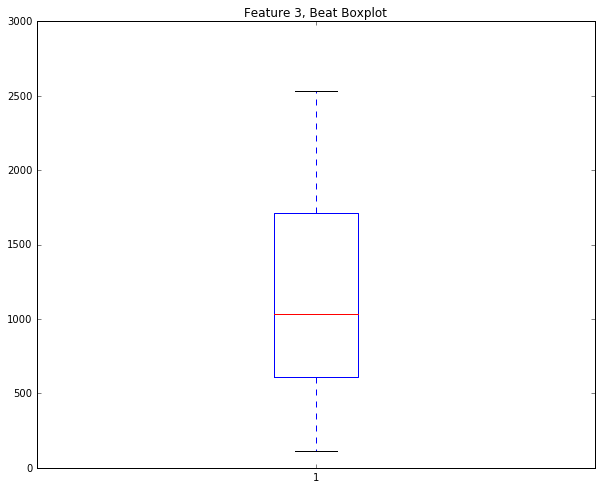

In [10]:
plt.boxplot(X[:,2])
plt.title('Feature 3, Beat Boxplot')

### Ward

Counter({25.0: 49249, 8.0: 26542, 43.0: 24807, 23.0: 24070, 29.0: 23528, 28.0: 22779, 32.0: 22195, 71.0: 21451, 24.0: 20847, 67.0: 20167, 68.0: 19283, 49.0: 19006, 69.0: 18376, 66.0: 17232, 26.0: 17052, 44.0: 16946, 6.0: 16174, 27.0: 15479, 22.0: 14130, 61.0: 14019, 46.0: 13948, 19.0: 13641, 30.0: 12852, 7.0: 11479, 53.0: 11243, 42.0: 10737, 3.0: 10598, 1.0: 10520, 15.0: 9654, 2.0: 9262, 38.0: 9144, 73.0: 8675, 16.0: 8227, 58.0: 7929, 40.0: 7818, 31.0: 7410, 35.0: 7128, 63.0: 6974, 14.0: 6932, 70.0: 6836, 77.0: 6619, 21.0: 6471, 65.0: 6024, 75.0: 5820, 51.0: 5735, 56.0: 5489, 76.0: 5364, 4.0: 5289, 33.0: 5218, 60.0: 4951, 20.0: 4882, 17.0: 4634, 5.0: 4158, 48.0: 4118, 41.0: 4076, 39.0: 3919, 45.0: 3860, 52.0: 3701, 10.0: 3688, 54.0: 3511, 11.0: 3345, 50.0: 3211, 34.0: 3203, 59.0: 3036, 62.0: 2964, 57.0: 2845, 64.0: 2752, 72.0: 2590, 13.0: 2542, 37.0: 2446, 74.0: 1853, 36.0: 1732, 55.0: 1645, 18.0: 1611, 12.0: 1365, 47.0: 1070, 9.0: 745, 0.0: 5})


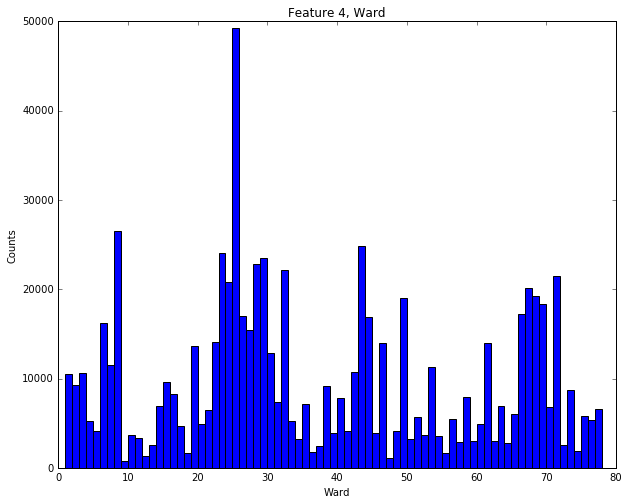

In [11]:
#ward, categorical with 77 categories
bins=np.arange(0,78,1)
c=collections.Counter(X[:,3])
print(c)
plt.bar(bins,c.values(),1);
plt.xlabel('Ward')
plt.ylabel('Counts')
plt.title('Feature 4, Ward')

### CPS Status

Counter({1.0: 429086, 0.0: 321740})


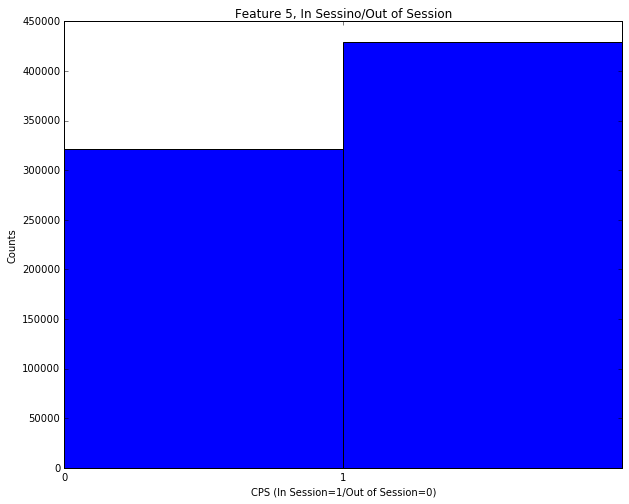

In [12]:
#cps, categorical, with 0 meaning no school
bins=[0,1]
c=collections.Counter(X[:,4])
print(c)
plt.bar(bins,c.values(),1);
plt.xlabel('CPS (In Session=1/Out of Session=0)')
plt.ylabel('Counts')
plt.xticks([0,1])
plt.title('Feature 5, In Sessino/Out of Session')

### Wind Speed

Feature Mean: 7.565 m/s
Feature Variance: 2.798


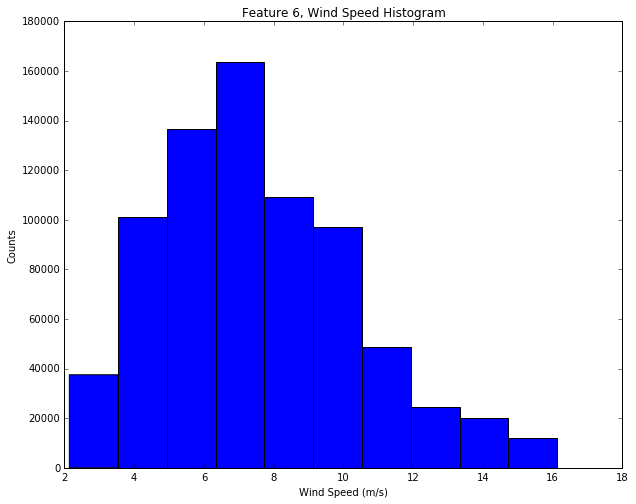

In [13]:
#wind speed(m/s), numeric
print("Feature Mean: %.3f m/s" %statistics.mean(X[:,5]))
print("Feature Variance: %.3f" %statistics.stdev(X[:,5]))
plt.hist(X[:,5])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Counts')
plt.title('Feature 6, Wind Speed Histogram')

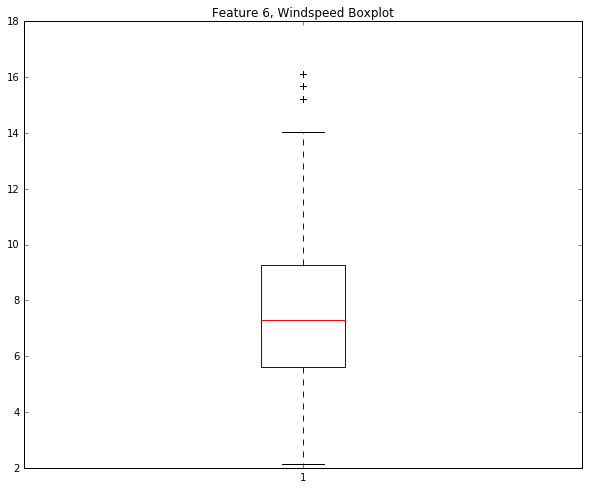

In [14]:
plt.boxplot(X[:,5])
plt.title('Feature 6, Windspeed Boxplot')

### Wind Direction

Feature Mean: 202.422
Feature Variance: 102.627


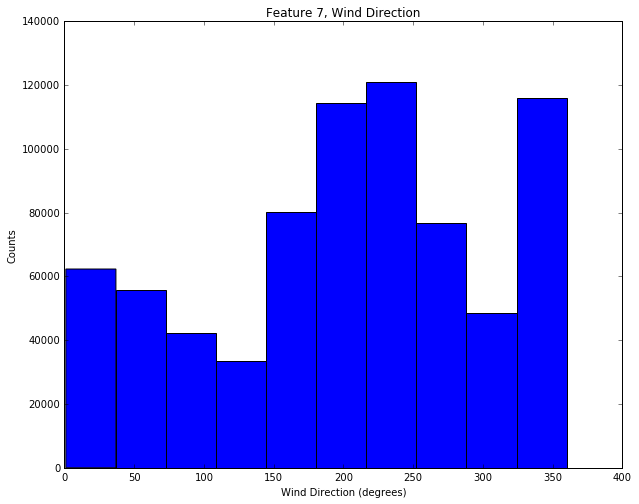

In [15]:
#wind direction, numeric ranging from 0 to 359 degrees
print("Feature Mean: %.3f" %statistics.mean(X[:,6]))
print("Feature Variance: %.3f" %statistics.stdev(X[:,6]))
plt.hist(X[:,6])
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('Counts')
plt.title('Feature 7, Wind Direction')

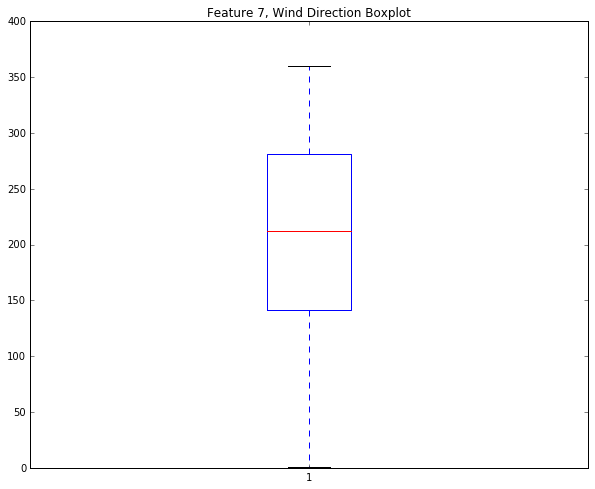

In [16]:
plt.boxplot(X[:,6])
plt.title('Feature 7, Wind Direction Boxplot')

### Daily Avg Temp

Feature Mean: 4.181 C
Feature Variance: 10.909


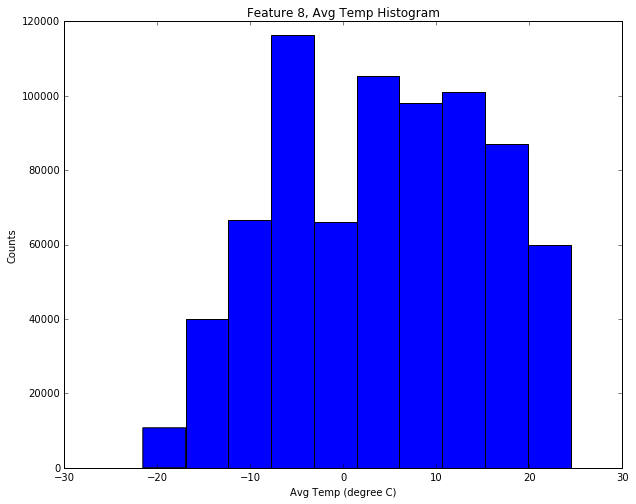

In [17]:
#daily avg temp (C), numeric
print("Feature Mean: %.3f C" %statistics.mean(X[:,7]))
print("Feature Variance: %.3f" %statistics.stdev(X[:,7]))
plt.hist(X[:,7])
plt.xlabel('Avg Temp (degree C)')
plt.ylabel('Counts')
plt.title('Feature 8, Avg Temp Histogram')

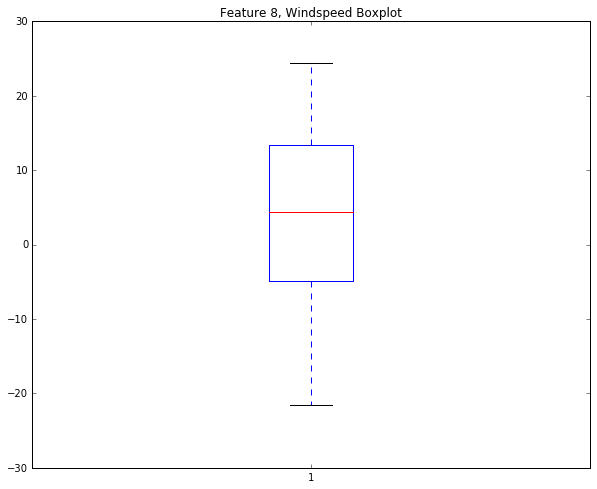

In [18]:
plt.boxplot(X[:,7])
plt.title('Feature 8, Windspeed Boxplot')

### Avg Temp of 5 Prior Days

Feature Mean: 3.654 C
Feature Variance: 10.137


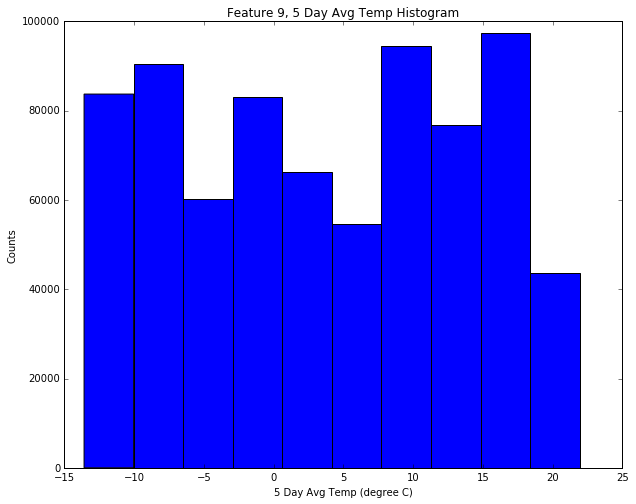

In [19]:
#5 prior avg temp, numeric, avg over 5 prior days
print("Feature Mean: %.3f C" %statistics.mean(X[:,8]))
print("Feature Variance: %.3f" %statistics.stdev(X[:,8]))
plt.hist(X[:,8])
plt.xlabel('5 Day Avg Temp (degree C)')
plt.ylabel('Counts')
#plt.xticks([0,1])
plt.title('Feature 9, 5 Day Avg Temp Histogram')

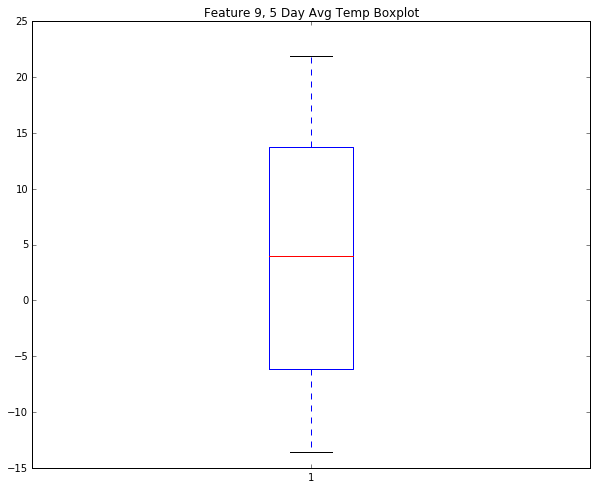

In [20]:
plt.boxplot(X[:,8])
plt.title('Feature 9, 5 Day Avg Temp Boxplot')

### Light or Dark Outside

Counter({0.0: 413742, 1.0: 337084})


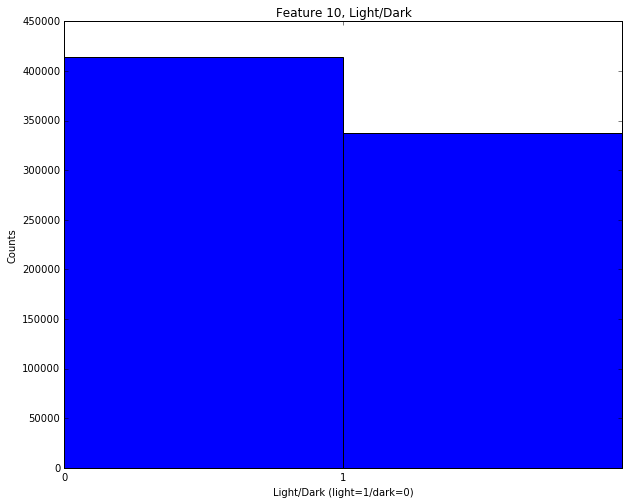

In [21]:
#light/dark, categorical, 0 meaning dark and 1 meaning light
bins=[0,1]
c=collections.Counter(X[:,9])
print(c)
plt.bar(bins,c.values(),1);
plt.xlabel('Light/Dark (light=1/dark=0)')
plt.ylabel('Counts')
plt.xticks([0,1])
plt.title('Feature 10, Light/Dark')

### Year

Counter({0.0: 413742, 1.0: 337084})
Counter({0.0: 503905, 1.0: 246921})
Counter({0.0: 631704, 1.0: 119122})


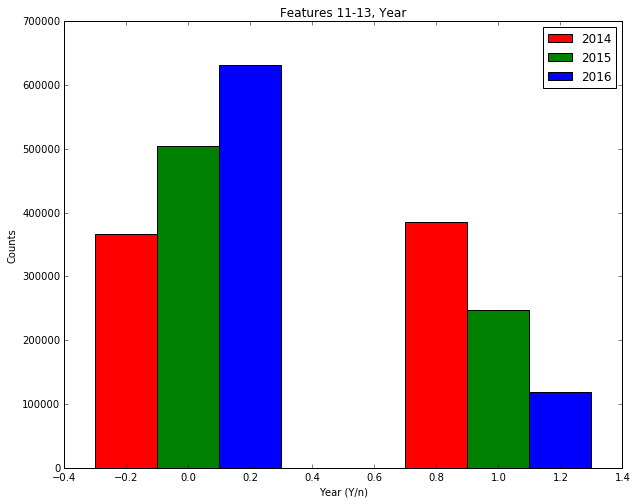

In [22]:
#year, categorical with three years, turned into binary featuers (all three years shown here)
#note that 2014 and 2015 were full year, with 2016 from jan1-June 30
bins=[0,1]
bins1=[-0.2,0.8]
bins2=[0.2,1.2]

c14=collections.Counter(X[:,10])
arr14=[c14[0],c14[1]]
print(c)
r1=plt.bar(bins1,arr14,width=0.2, color='r',align='center');

c15=collections.Counter(X[:,11])
arr15=[c15[0],c15[1]]
print(c15)
r2=plt.bar(bins,arr15,width=0.2, color='g',align='center');

c16=collections.Counter(X[:,12])
arr16=[c16[0],c16[1]]
print(c16)
r3=plt.bar(bins2,arr16,width=0.2,color='b',align='center');

plt.xlabel('Year (Y/n)')
plt.ylabel('Counts')
plt.title('Features 11-13, Year')
plt.legend((r1[0], r2[0], r3[0]), ('2014', '2015', '2016'))

### Day of Week

Counter({0.0: 413742, 1.0: 337084})
Counter({0.0: 646148, 1.0: 104678})
Counter({0.0: 646303, 1.0: 104523})
Counter({0.0: 643539, 1.0: 107287})
Counter({0.0: 644933, 1.0: 105893})
Counter({0.0: 636971, 1.0: 113855})
Counter({0.0: 641420, 1.0: 109406})


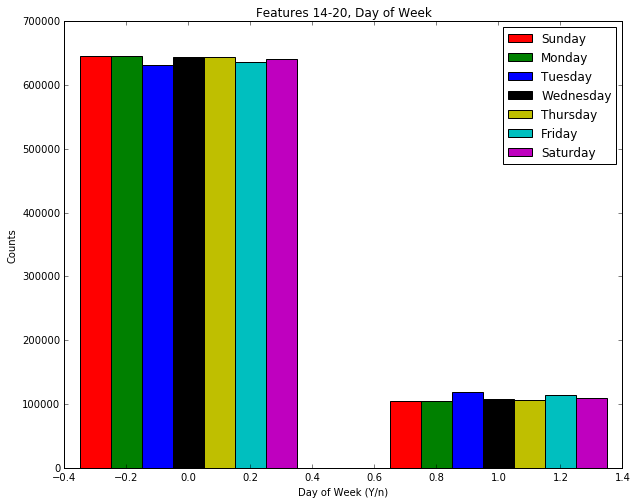

In [23]:
bins=[0,1]
bins1=[-0.1,0.9]
bins2=[0.1,1.1]
bins3=[-0.2,0.8]
bins4=[0.2,1.2]
bins5=[-0.3,0.7]
bins6=[0.3,1.3]

cSun=collections.Counter(X[:,13]) #sunday feature
arrSun=[cSun[0],cSun[1]]
print(c)
r1=plt.bar(bins5,arrSun,width=0.1, color='r',align='center');

cMon=collections.Counter(X[:,14]) #monday feature
arrMon=[cMon[0],cMon[1]]
print(cMon)
r2=plt.bar(bins3,arrMon,width=0.1, color='g',align='center');

cTue=collections.Counter(X[:,15])#tuesday feature
arrTue=[cTue[0],cTue[1]]
print(cTue)
r3=plt.bar(bins1,arr16,width=0.1,color='b',align='center');

cWed=collections.Counter(X[:,16])#wednesday feature
arrWed=[cWed[0],cWed[1]]
print(cWed)
r4=plt.bar(bins,arrWed,width=0.1,color='k',align='center');

cThur=collections.Counter(X[:,17])#thursday feature
arrThur=[cThur[0],cThur[1]]
print(cThur)
r5=plt.bar(bins2,arrThur,width=0.1,color='y',align='center');

cFri=collections.Counter(X[:,18])#friday feature
arrFri=[cFri[0],cFri[1]]
print(cFri)
r6=plt.bar(bins4,arrFri,width=0.1,color='c',align='center');

cSat=collections.Counter(X[:,19])#saturday feature
arrSat=[cSat[0],cSat[1]]
print(cSat)
r7=plt.bar(bins6,arrSat,width=0.1,color='m',align='center');

plt.xlabel('Day of Week (Y/n)')
plt.ylabel('Counts')
plt.title('Features 14-20, Day of Week')
plt.legend((r1[0], r2[0], r3[0],r4[0],r5[0],r6[0],r7[0]), ('Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday'))